
# The baseline query + purpose and target : all in context

"Purpose of the translation: To study the accuracy of LLMs on Low resource languages, particularly Darija." + 

"Target audience: Computational linguists"   

# 56.3 %

In [1]:
import pandas as pd
# dataframe and load of verbs
df = pd.read_csv('verbs.csv')
darija = df['darija_ar'].tolist()

eng = df['eng']

In [2]:
empty_check = df['darija_ar'].isna()
empty_count = empty_check.sum()
print(empty_count)

0


In [4]:
from openai import OpenAI
client = OpenAI()

transl = []

for verb in darija:
    completion = client.chat.completions.create(
    model =  "gpt-3.5-turbo",
    messages = [
    {"role": "system",   "content": "Translate the provided Moroccan Darija language verbs into English using word-by-word translation." +
    "Please fulfill the following conditions when translating."+
    "The translation must contain only the lemma of the translated verb. For example, it should not contain 'to'"+
    "Purpose of the translation: To study the accuracy of LLMs on Low resource languages, particularly Darija." + 
    "Target audience: Computational linguists" 
    
    },
    {
        "role": "user", 
        "content":  f'{verb}' 
    }
    ],
    temperature=0, # deterministic
    #max_tokens=1, # in case of a dot
    )
    transl.append(completion.choices[0].message.content)

print(transl)

['eat', 'drink', 'enter', 'exit', 'understand', 'explain', 'read', 'read', 'hear', 'see', 'smell', 'go', 'measure', 'go', 'come', 'go out', 'descend', 'year', 'drown', 'wear', 'asked', 'buy', 'sell', 'arrived', 'write', 'wipe', 'hit', 'greet', 'tired', 'shake', 'laugh', 'anger', 'bring', 'be', 'live', 'say', 'say', 'have', 'tighten', 'think', 'Come', 'find', 'give', 'work', 'call', 'lose', 'feel', 'to find', 'put', 'have', 'start', 'lose', 'find', 'like', 'inform', 'helped', 'free', 'find', 'Believe', 'try', 'try', 'suggest', 'think', 'go', 'showed', 'play', 'run', 'run', 'read', 'start', 'asked', 'cut', 'speak', 'thank', 'change', 'complete', 'agree', 'wish', 'follow', 'kissed', 'refuse', 'fall', 'to wash', 'win', 'increase', 'learn', 'waited', 'will-fall', 'sell', 'buy', 'solve', 'build', 'choose', 'arrive', 'decide', 'Activate', 'watch', 'lose', 'walks', 'big', 'imagine', 'cause', 'chop', 'hear', 'grow', 'die', 'die', 'visit', 'encourage', 'protect', 'publish', 'kill', 'to climb', '

In [5]:
# Ensure both columns are of the same length
assert len(transl) == len(eng), "Columns must be of the same length."

In [8]:
from nltk.corpus import wordnet as wn

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""
    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score
# Calculate and print the path similarity for each pair of verbs with similar index

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
print(results)



[('eat', 'eat', 1.0, True), ('drink', 'drink', 1.0, True), ('enter', 'enter', 1.0, True), ('exit', 'go out', 0, False), ('understand', 'understand', 1.0, True), ('explain', 'explain', 1.0, True), ('read', 'learn', 1.0, True), ('read', 'teach', 0.25, False), ('hear', 'hear', 1.0, True), ('see', 'see', 1.0, True), ('smell', 'smell', 1.0, True), ('go', 'taste', 0.3333333333333333, False), ('measure', 'touch', 0.25, False), ('go', 'go', 1.0, True), ('come', 'come', 1.0, True), ('go out', 'ascend', 0, False), ('descend', 'go down', 0, False), ('year', 'swim', 0, False), ('drown', 'drown', 1.0, True), ('wear', 'wear', 1.0, True), ('asked', 'take off', 0, False), ('buy', 'buy', 1.0, True), ('sell', 'sell', 1.0, True), ('arrived', 'bargain', 0.14285714285714285, False), ('write', 'write', 1.0, True), ('wipe', 'clean', 0.16666666666666666, False), ('hit', 'hit', 1.0, True), ('greet', 'salute', 0.5, True), ('tired', 'fatigue', 1.0, True), ('shake', 'exhaust', 0.25, False), ('laugh', 'laugh', 1.0

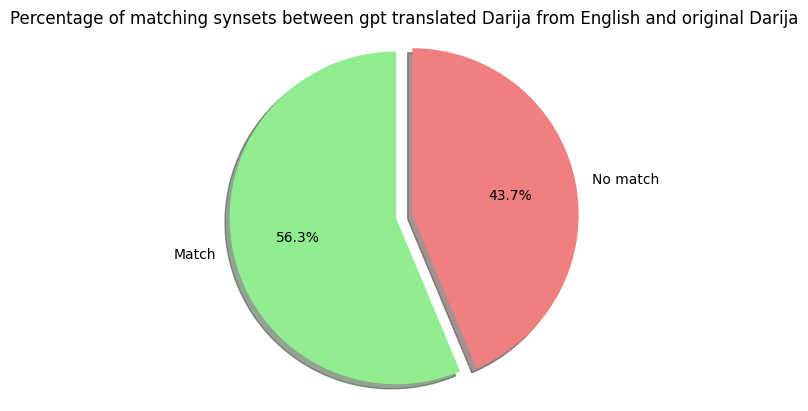

In [7]:
import matplotlib.pyplot as plt

# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")
plt.show()